In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x
        

In [4]:
torch.manual_seed(43)
model=Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv("D:\priya\BML Datasets\BML Datasets\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data["Species"]=data["Species"].replace("Iris-setosa",0.0)
data["Species"]=data["Species"].replace("Iris-versicolor",1.0)
data["Species"]=data["Species"].replace("Iris-virginica",2.0)
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [8]:
x=data.drop(['Id','Species'],axis=1)
y=data['Species']
x=x.values
y=y.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [11]:
x_train=torch.FloatTensor(x_train) #since we have the x values in float datatype
x_test=torch.FloatTensor(x_test)
x_train

tensor([[4.7000, 3.2000, 1.6000, 0.2000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.9000, 1.3000, 0

In [13]:
y_train=torch.LongTensor(y_train) #to convert the y labels into long dtype
y_test=torch.LongTensor(y_test)
y_train

tensor([0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2,
        0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2,
        1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
        1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
        1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
epochs=200
losses=[]
for i in range(epochs):
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    if i%10 ==0:
        print(f'Epoch:{i} and loss :{loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss :1.1987797021865845
Epoch:10 and loss :0.9746183156967163
Epoch:20 and loss :0.7396119236946106
Epoch:30 and loss :0.5222283601760864
Epoch:40 and loss :0.39292052388191223
Epoch:50 and loss :0.2961462438106537
Epoch:60 and loss :0.19317448139190674
Epoch:70 and loss :0.11897898465394974
Epoch:80 and loss :0.08483503013849258
Epoch:90 and loss :0.07021108269691467
Epoch:100 and loss :0.06306641548871994
Epoch:110 and loss :0.05916385352611542
Epoch:120 and loss :0.05675506591796875
Epoch:130 and loss :0.055115971714258194
Epoch:140 and loss :0.053914330899715424
Epoch:150 and loss :0.05298369377851486
Epoch:160 and loss :0.05223124846816063
Epoch:170 and loss :0.05160057544708252
Epoch:180 and loss :0.0510559044778347
Epoch:190 and loss :0.050574421882629395


Text(0.5, 0, 'Epochs')

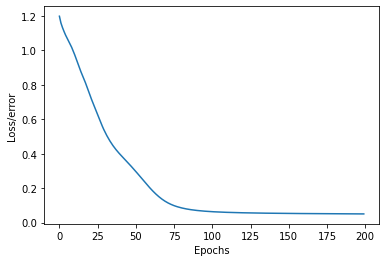

In [17]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss/error")
plt.xlabel("Epochs")

In [18]:
with torch.no_grad():#to turn off the back propogation in order to test the model
    y_eval=model.forward(x_test)
    loss=criterion(y_eval,y_test)
    

In [19]:
loss

tensor(0.0283)

In [27]:
correct=0
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val=model.forward(data)
        
        if y_test[i]==0:
            x="Setosa"
        elif y_test[i]==1:
            x="Versicolor"
        else:
            x="Virginica"
            
    
        print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
        
        if y_val.argmax().item()==y_test[i]:
            correct+=1

print(f'We got {correct} correct!')
    

1.) tensor([-1.6896,  9.2107,  3.0886]) 	 Versicolor 	 1
2.) tensor([ 18.5322,  10.4955, -20.8100]) 	 Setosa 	 0
3.) tensor([-13.7054,   6.4317,  22.1594]) 	 Virginica 	 2
4.) tensor([-2.4712,  8.5184,  4.2538]) 	 Versicolor 	 1
5.) tensor([-2.4346,  9.4717,  4.2518]) 	 Versicolor 	 1
6.) tensor([ 17.2126,   9.7662, -19.3443]) 	 Setosa 	 0
7.) tensor([ 1.7113,  9.0084, -1.7035]) 	 Versicolor 	 1
8.) tensor([-7.6979,  7.1241, 12.2813]) 	 Virginica 	 2
9.) tensor([-4.3489,  7.7519,  7.1085]) 	 Versicolor 	 1
10.) tensor([ 0.6978,  9.1716, -0.3433]) 	 Versicolor 	 1
11.) tensor([-6.1224,  7.6197,  9.8762]) 	 Virginica 	 2
12.) tensor([ 16.7831,   9.3187, -18.8194]) 	 Setosa 	 0
13.) tensor([ 18.1759,  10.1043, -20.3719]) 	 Setosa 	 0
14.) tensor([ 17.1127,   9.5089, -19.1889]) 	 Setosa 	 0
15.) tensor([ 17.7784,   9.8754, -19.9283]) 	 Setosa 	 0
16.) tensor([-2.2597,  9.0386,  3.9637]) 	 Versicolor 	 1
17.) tensor([-10.1978,   6.2303,  16.2524]) 	 Virginica 	 2
18.) tensor([ 0.4446,  8.93